<a href="https://colab.research.google.com/github/AzlinRusnan/Python-Coding/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [33]:
# Read in the titanic data
file_path = '/content/gdrive/MyDrive/tested.csv'
titanic = pd.read_csv(file_path)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [40]:
# How many passengers are included in this dataset?
#titanic.shape
print("Number of passengers: ", len(titanic))

Number of passengers:  418


In [35]:
# Check the titanic data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [41]:
#Find the NaN values in the data
#titanic.info()
# Check for missing values
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [37]:
#Data Cleaning

#Check for missing values in the dataset. Which columns have missing values?
titanic.columns[titanic.isna().any()]

Index(['Age', 'Fare', 'Cabin'], dtype='object')

In [39]:
#Fill missing values in the "Age" column with the median age of passengers. Explain why you chose this method.
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
titanic.columns[titanic.isna().any()]

#Filling missing 'Age' values with the median helps to retain the overall distribution without adding bias.

Index(['Fare', 'Cabin'], dtype='object')

In [47]:
#Drop columns that you deem unnecessary for analysis. Justify your choices.
titanic.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
titanic.head()

#error showing the two columns was successfully dropped
#'Cabin' has too many missing values, and 'Ticket' numbers are unique to each passenger and don't provide useful information for basic analysis.

KeyError: "['Cabin', 'Ticket'] not found in axis"

In [48]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [ ]:
##Data Analysis

In [52]:
#Calculate the survival rate for passengers under the age of 18.
under_18_survival_rate = titanic[titanic['Age'] < 18]['Survived'].mean()
print(under_18_survival_rate)

#meaning that approximately 41.46% survival rate under 18

0.4146341463414634


In [54]:
#Compare the survival rates of male vs. female passengers.
female_survival_rate = titanic[titanic['Sex'] == 'female']['Survived'].mean()
print(female_survival_rate)

1.0


In [56]:
male_survival_rate = titanic[titanic['Sex'] == 'male']['Survived'].mean()
print(f"Male survival rate: {male_survival_rate}, Female survival rate: {female_survival_rate}")

#number of survival rate is not tally with the real life data perhaps the dataset is not fully catter the real data

Male survival rate: 0.0, Female survival rate: 1.0


In [57]:
#What was the average fare paid by passengers in each class?
average_fare_paid_per_class = titanic.groupby('Pclass')['Fare'].mean()
print("Average fare by class:", average_fare_paid_per_class)

Average fare by class: Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64


In [ ]:
#Grouping and Aggregation

In [58]:
#Group the dataset by 'Pclass' and calculate the mean 'Age' and 'Survived' for each class.
class_grouping = titanic.groupby('Pclass')[['Age','Survived']].mean()
print(class_grouping)

              Age  Survived
Pclass                     
1       39.747664  0.467290
2       28.681935  0.322581
3       25.009541  0.330275


In [59]:
#Identify the top 3 embarkation points with the highest average fare.
embark_point = titanic.groupby('Embarked')['Fare'].mean().nlargest(3)
print(embark_point)

Embarked
C    66.259765
S    28.230436
Q    10.957700
Name: Fare, dtype: float64


In [61]:
#Create a new column named 'FamilySize' by adding the number of siblings/spouses ('SibSp') to the number of parents/children ('Parch').
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0


In [63]:
#Create a categorical column named 'AgeGroup' categorizing passengers into 'Child', 'Teen', 'Adult', and 'Senior'. Define the age ranges for each group.
bins = [0,12,18,60,100]
labels = ['Child','Teen','Adult','Senior']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)
print(titanic[['Age', 'AgeGroup']].head(10))
titanic.head(3)

    Age AgeGroup
0  34.5    Adult
1  47.0    Adult
2  62.0   Senior
3  27.0    Adult
4  22.0    Adult
5  14.0     Teen
6  30.0    Adult
7  26.0    Adult
8  18.0    Adult
9  21.0    Adult


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeGroup
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,Senior


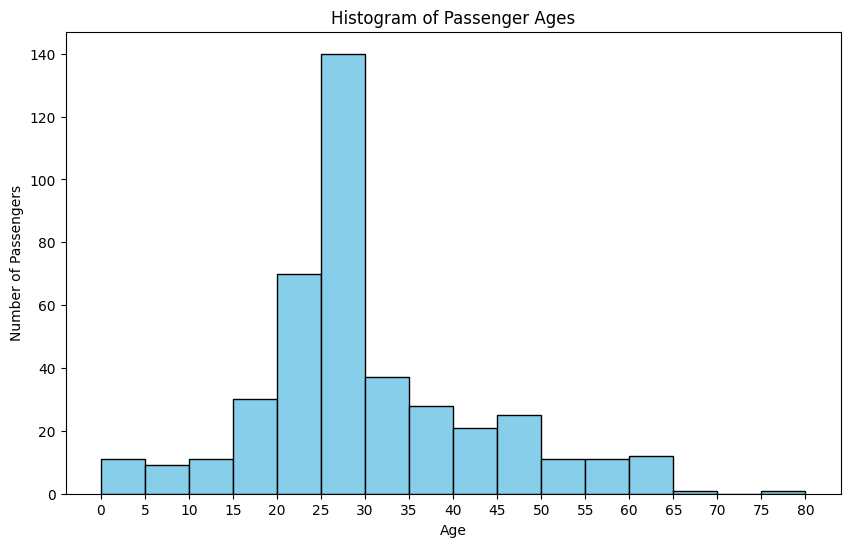

In [64]:
#Data Visualization with Matplotlib/Seaborn
#Basic Plots
#Create a histogram of the ages of passengers. Customize the bins to improve readability.
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=range(0, 81, 5), color='skyblue', edgecolor='black')
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 81, 5))
plt.show()